In [1]:
import pandas as pd
import os

In [2]:
import seaborn as sns

In [109]:
data_dir = "./data/"
dataset = './data/tuples/autovac/autovacon_ycsb_scale_50_worktime_3600_samplefreq_1_tsizeAnddeadtuple_pgconfig_delete_25_dead_tup_dtw.csv'

In [110]:
df = pd.read_csv(dataset)

In [111]:
df.head()

,ds,table_name,pg_stat_get_live_tuples,pg_stat_get_dead_tuples,pg_table_size,relid,schemaname,relname,seq_scan,seq_tup_read,...,n_mod_since_analyze,n_ins_since_vacuum,last_vacuum,last_autovacuum,last_analyze,last_autoanalyze,vacuum_count,autovacuum_count,analyze_count,autoanalyze_count
0,1.650448e+09,public.usertable,50000,0,58556416,16943,public,usertable,1,0,...,50000,50000,NaN,NaN,NaN,NaN,0,0,0,0
1,1.650448e+09,public.usertable,50000,0,58638336,16943,public,usertable,1,0,...,50000,50000,NaN,NaN,NaN,NaN,0,0,0,0
2,1.650448e+09,public.usertable,49963,398,59097088,16943,public,usertable,1,0,...,50530,50097,NaN,NaN,NaN,NaN,0,0,0,0
3,1.650448e+09,public.usertable,49923,894,59588608,16943,public,usertable,1,0,...,51207,50238,NaN,NaN,NaN,NaN,0,0,0,0
4,1.650448e+09,public.usertable,49894,1395,60112896,16943,public,usertable,1,0,...,51912,50396,NaN,NaN,NaN,NaN,0,0,0,0


In [112]:
df.table_name.unique()

array(['public.usertable'], dtype=object)

In [113]:
df.columns

Index(['ds', 'table_name', 'pg_stat_get_live_tuples',
       'pg_stat_get_dead_tuples', 'pg_table_size', 'relid', 'schemaname',
       'relname', 'seq_scan', 'seq_tup_read', 'idx_scan', 'idx_tup_fetch',
       'n_tup_ins', 'n_tup_upd', 'n_tup_del', 'n_tup_hot_upd', 'n_live_tup',
       'n_dead_tup', 'n_mod_since_analyze', 'n_ins_since_vacuum',
       'last_vacuum', 'last_autovacuum', 'last_analyze', 'last_autoanalyze',
       'vacuum_count', 'autovacuum_count', 'analyze_count',
       'autoanalyze_count'],
      dtype='object')

In [114]:
df['ds'] = df['ds']-df['ds'].min()
df['ds'] = pd.to_datetime(df['ds'], unit='s')

In [115]:
def plot_growth(df, col):
    return sns.lineplot(data=df, x='ds', y=col, hue='table_name')

<AxesSubplot:xlabel='ds', ylabel='n_dead_tup'>

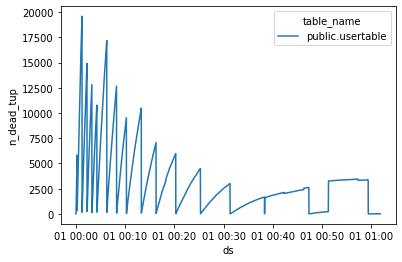

In [116]:
# g = sns.FacetGrid(df, row='table_name', sharey=False, sharex=False)
# g.map(sns.lineplot, "ds", "n_dead_tup")
sns.lineplot(data=df, x='ds', y='n_dead_tup', hue='table_name')

In [ ]:
sns.lineplot()

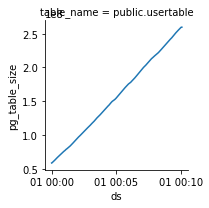

In [90]:
g2 = sns.FacetGrid(df, row='table_name', sharey=False)
g2.map(sns.lineplot, "ds", "pg_table_size")

<AxesSubplot:>

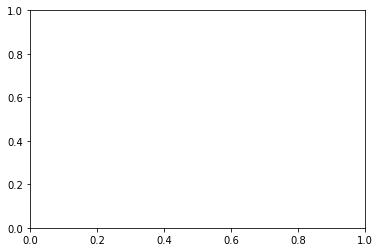

In [55]:
plot_growth(df[df['table_name'] == 'public.customer'].copy(), 'pg_table_size')

<AxesSubplot:>

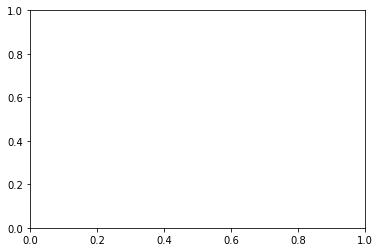

In [16]:
plot_growth(df[df['table_name'] == 'public.stock'].copy(), 'n_dead_tup')

In [ ]:
from neuralprophet import NeuralProphet